1) Créez une fonction qui télécharge les données historiques d’un stock ou un indice au choix et afficher le
graph de l’évolution du cours sur la période choisie. La librairie yfinance, tirée de yahoo finance, permet de
télécharger les données très facilement en indiquant simplement le ticker (le stock ou l’indice désiré) ainsi
que la plage de date requise.


2) A partir de la fonction faite dans l’exercice 1 q1, réaliser une fonction calculant les logs returns d’un stock
choisi et affichez les.


3) Créez une fonction qui génère des trajectoires de de Monte Carlo en supposant que le sous-jacent suis un
mouvement brownien géométrique.


4) Affichez les simulations de Monte Carlo dans le même graphique que l’évolution des données historique. 
Il est judicieux d’utiliser une année comme période globale, pour ne pas nuire à la lisibilité du graph. De
même, générer un (très) nombre faible de trajectoires est une bonne idée pour la même raison. Vous
pouvez choisi les valeurs que vous souhaitez pour mu et sigma.
Tips 1 : Pensez à modifier votre fonction générant des trajectoires de manière à conserver chaque prix
généré et non pas simplement le dernier prix.
Tips 2 : Pensez aux paramètres à employer lors de la génération des trajectoires : les données historiques
fournissent des valeurs journalières. Il faut donc que les trajectoires fournissent un nombre de points
équivalent.


5) Que pensez-vous de l’utilisation de valeur « aléatoire » pour mu et sigma ? Pensez-vous à une autre
approche ? Une approche possible consisterait à utiliser les données historiques pour fixer mu et la volatilité
(sigma). Comparez vos résultats en utilisant les données historiques de la période « courte) uniquement
pour trouver mu et sigma : que remarquez-vous et pourquoi ce résultat ?


6) Bonus – POO : Créez une classe « Stock » avec pour différentes méthodes les fonctions mentionnées plus
haut ainsi qu’en créant et utilisant judicieusement des attributs de classe. Pensez à adapter vos fonctions si
nécessaires. L’affichage des données peut se faire dans le « main » pour éviter de démultiplier les fonctions
d’affichages. Vous avez désormais une façon simple d’analyser un large nombre de stock en peu de temps : il
vous suffira d’instancier la classe avec votre ticker (et éventuellement vos dates selon vos choix) puis
d’appeler les méthodes pour obtenir des données intéressantes.

[*********************100%***********************]  1 of 1 completed


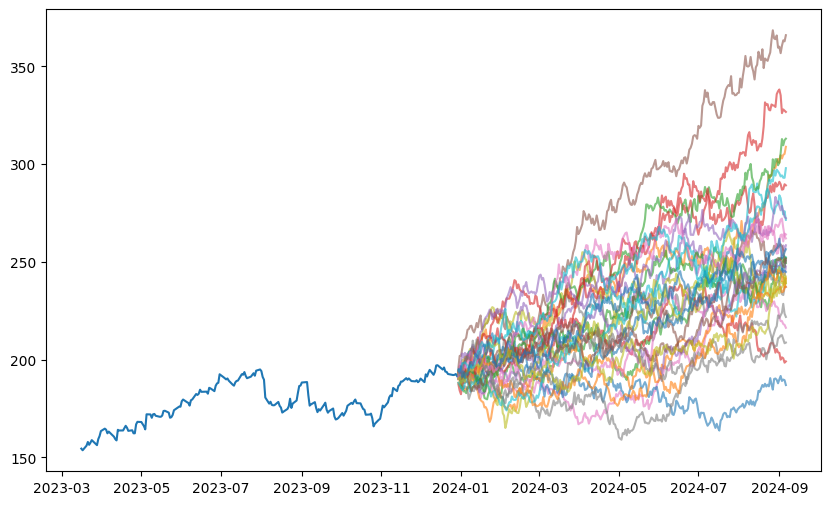

In [104]:
class Stock():
    def __init__(self, ticker) -> None:
        self.ticker = ticker
    
    def calculate_stock_prices(self, start= "2020-01-01", end= "2024-01-01"):
        import yfinance as yf
        import pandas as pd
        self.returns = pd.DataFrame(yf.download(tickers =  self.ticker, start=start, end = end)["Close"].reset_index())

        self.returns = self.returns.tail(200).reset_index(drop=True)

        return self.returns
    
    def calculate_log_returns(self):
        import numpy as np
        self.returns['log_ret'] = np.log(self.returns["AAPL"]) - np.log(self.returns["AAPL"].shift(1))   
        return self.returns['log_ret']
    
    def montecarlo(self, number_sims, duration):
        import numpy as np
        import matplotlib.pyplot as plt
        import pandas as pd

        plt.figure(figsize=(10,6))
        plt.plot(self.returns["Date"], self.returns["AAPL"], label="Historique")

        mean_returns, std_returns = self.returns["log_ret"].mean(), self.returns["log_ret"].std()
        
        initial = self.returns["AAPL"].iloc[-1]
        last_date = self.returns["Date"].iloc[-1]

        for i in range(1,number_sims + 1):
            sim_rets = np.random.normal(mean_returns, std_returns, duration)
            sim_prices = initial * (sim_rets + 1).cumprod()

            sim_dates = pd.date_range(start= last_date + pd.Timedelta(days=1),
                                  periods=duration, freq='D')

            plt.plot(sim_dates, sim_prices, alpha=0.6)

        return sim_rets
        
def main():

    stock1 = Stock("AAPL")

    stock1.calculate_stock_prices()
    stock1.calculate_log_returns()

    stock1.montecarlo(30, 252)

if __name__ == "__main__":
    main()



In [99]:
stock1 = Stock("AAPL")

In [100]:
stock1.return_stock_prices()

[*********************100%***********************]  1 of 1 completed


Ticker,Date,AAPL
0,2023-03-16,154.463638
1,2023-03-17,153.621201
2,2023-03-20,155.999832
3,2023-03-21,157.863083
4,2023-03-22,156.426025
...,...,...
195,2023-12-22,192.656189
196,2023-12-26,192.108856
197,2023-12-27,192.208359
198,2023-12-28,192.636261


In [101]:
stock1.return_log_returns()

0           NaN
1     -0.005469
2      0.015365
3      0.011873
4     -0.009145
         ...   
195   -0.005563
196   -0.002845
197    0.000518
198    0.002224
199   -0.005439
Name: log_ret, Length: 200, dtype: float64

array([-1.31131991e-02, -4.91719307e-04,  8.07226002e-04, -2.01760910e-03,
        5.68481933e-03,  1.20713399e-02, -2.16785761e-03,  2.65053580e-02,
       -4.65235778e-03,  2.28974343e-02, -2.77818972e-03,  5.97065717e-03,
       -1.10357919e-02, -1.47691037e-02,  7.23111328e-03,  3.30076818e-02,
       -6.84920310e-03, -8.62450837e-03,  8.37907686e-03, -6.81673980e-03,
        6.69899521e-03, -3.70536818e-03,  2.02257679e-02,  9.09964245e-03,
        5.41664931e-03,  8.72905178e-03, -1.09950208e-02, -8.16730794e-03,
       -1.13830846e-02, -2.54857893e-02,  1.45505606e-02,  1.59829448e-02,
        7.44613914e-03,  1.00097908e-02,  1.00114282e-02,  7.03568159e-03,
       -3.62374165e-02, -1.61724260e-02,  1.82506099e-02,  9.46966444e-03,
        1.55735588e-02,  8.39994068e-03, -1.66870667e-02,  1.79358749e-02,
        7.74116956e-03, -1.23521938e-02, -2.04571367e-02, -4.73535462e-03,
        1.76231919e-02, -1.15267306e-02, -9.82026399e-03, -3.31894256e-03,
       -7.66776599e-03,  

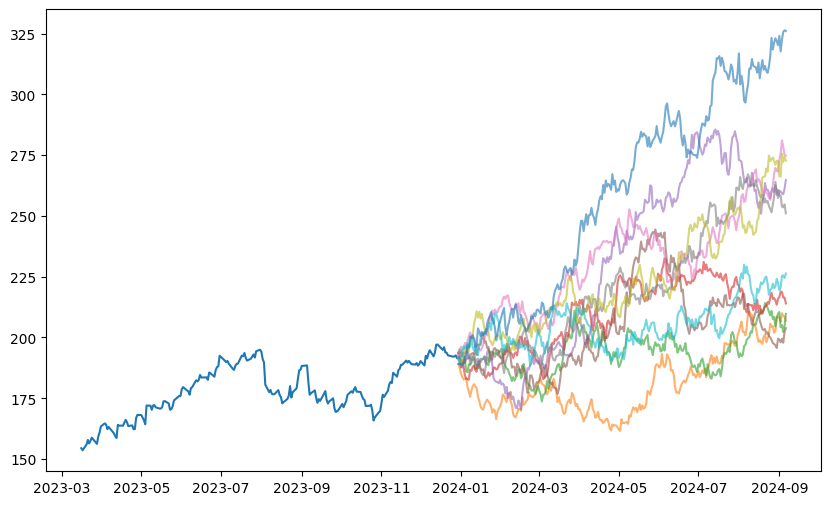

In [102]:
stock1.montecarlo(10,252)